## Topic: Pandas challenges
## Subject: Pandas (Exploring and visualizing our scraped movie data in pandas)
## Date: 06/10/2018
## Name: Amine Naouas
## Worked with: -¶

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [312]:
# df = pd.read_csv('2013_movies.csv',parse_dates=['ReleaseDate'], infer_datetime_format=True)
df = pd.read_csv('2013_movies.csv')

In [313]:
df["ReleaseDate"] = pd.to_datetime(df.ReleaseDate, 
                                            format="%Y-%m-%d %H:%M:%S")

In [314]:
# df.head()

In [315]:
# df.dtypes

In [316]:
# pdf.ProfileReport(df)

** Challenge 1 **

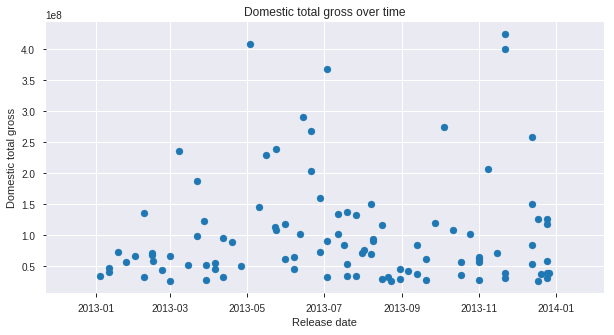

In [317]:
plt.figure(figsize=(10,5))
x=list(df['ReleaseDate'])
y=list(df['DomesticTotalGross'])
plt.scatter(x,y)
plt.xlabel('Release date')
plt.ylabel('Domestic total gross')
plt.title('Domestic total gross over time');

** Challenge 2 **

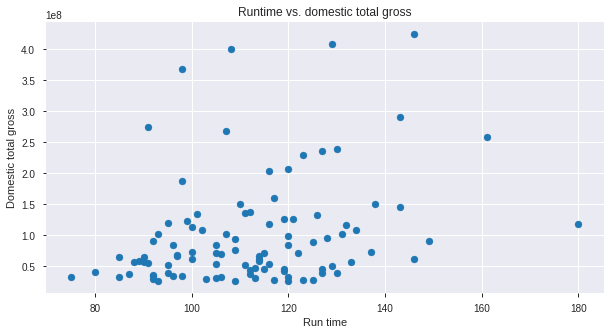

In [318]:
plt.figure(figsize=(10,5))
x=list(df['Runtime'])
y=list(df['DomesticTotalGross'])
plt.scatter(x,y)
plt.xlabel('Run time')
plt.ylabel('Domestic total gross')
plt.title('Runtime vs. domestic total gross');

** Challenge 3 **

In [319]:
df.groupby(['Rating']).agg({'Runtime': 'mean','DomesticTotalGross': 'mean'}).reset_index().sort_values('Rating')

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


** Challenge 4 **

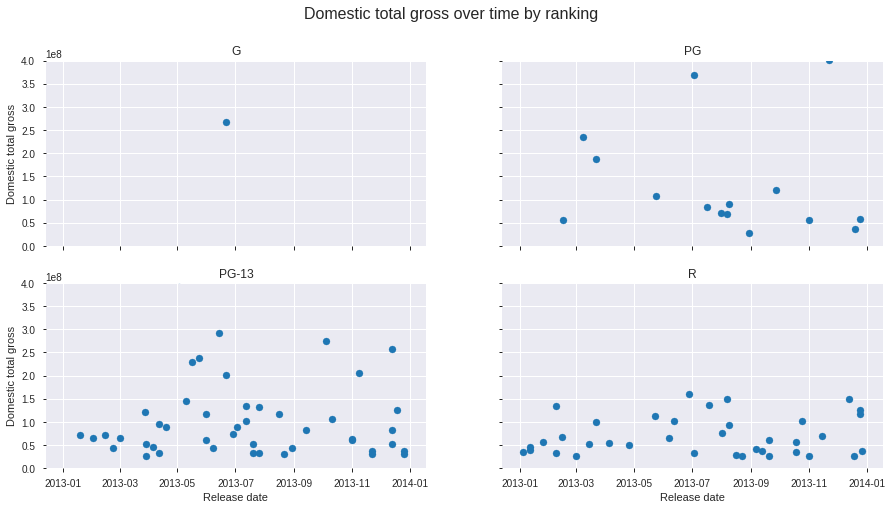

In [320]:
x1=list(df[df.Rating=='G']['ReleaseDate'])
y1=list(df[df.Rating=='G']['DomesticTotalGross'])

x2=list(df[df.Rating=='PG']['ReleaseDate'])
y2=list(df[df.Rating=='PG']['DomesticTotalGross'])

x3=list(df[df.Rating=='PG-13']['ReleaseDate'])
y3=list(df[df.Rating=='PG-13']['DomesticTotalGross'])

x4=list(df[df.Rating=='R']['ReleaseDate'])
y4=list(df[df.Rating=='R']['DomesticTotalGross'])


fig, ax = plt.subplots(2, 2, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(7.5)

fig.suptitle('Domestic total gross over time by ranking',fontsize = 16)


ax[0,0].scatter(x1,y1)
ax[0,0].set_title('G')

ax[0,1].scatter(x2,y2)
ax[0,1].set_title('PG')

ax[1,0].scatter(x3,y3)
ax[1,0].set_title('PG-13')

ax[1,1].scatter(x4,y4)
ax[1,1].set_title('R')

for a in ax.flat:
    a.set(xlabel='Release date', ylabel='Domestic total gross')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
#set same x,y limits for all subplots
for (m,n), subplot in np.ndenumerate(ax):
#     subplot.set_xlim(xval1,xval2)
    subplot.set_ylim(0,4*10**8)
# ;


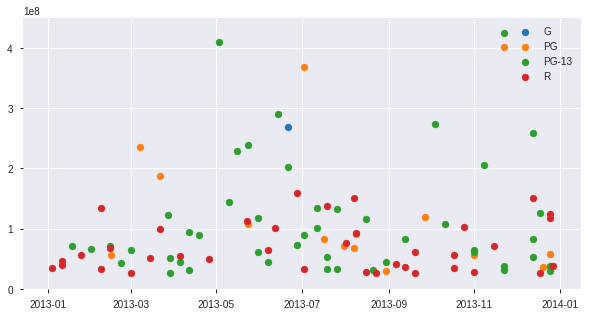

In [321]:
# Alternative

groups = df.groupby('Rating')

# Plot
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.scatter(list(group.ReleaseDate), list(group.DomesticTotalGross), label=name)
ax.legend()

plt.show()

** Challenge 5 **

In [322]:
df.dropna(subset=['Director'], inplace=True)

In [323]:
def get_dir2(director):    # 'director' is one single value from a pd.Series of rows (we iterate down rows)
    
    # Match strings containing a lowercase next to an upper case (consecutively, in that order)
    match = re.match('.+[a-z][A-Z]', director)
    
    # If there is a match, find where that match *ends*, and go back one (note, this captures the last/second match)
    # (This is where name2 should start.)
    if match:
        startnew = match.span()[1] - 1
        
        # Don't say that there are multiple names if it's just a McFly sort of thing
        if director[startnew-2:startnew] == 'Mc' or director[startnew-2:startnew] == 'De' or director[startnew-3:startnew] == 'Mac':
            return None
        else:
            return director[startnew:]
    
    return None

# This is very similar to above, we just want to take the former name
def get_dir1(director):
    
    match = re.match('.+[a-z][A-Z]', director)
    
    if match:
        enddir = match.span()[1] - 1
        
        # In this if/else, we take the former
        if director[enddir-2:enddir] == 'Mc' or director[enddir-3:enddir] == 'Mac' or director[enddir-2:enddir] == 'De':
            return director
        else:
            return director[:enddir]
    
    return director

df['Director1'] = df['Director'].apply(get_dir1)
df['Director2'] = df['Director'].apply(get_dir2)

In [324]:
# df.sort_values(by='Director2').head()

In [325]:
df_two_dir = df[~df['Director2'].isna()]    # First, let's gather all of the movies whose 'Director2' is *not* (~) NA. (Movies with two directors)
df_two_dir['Duplicate']=True # dummy for duplicates

df['Duplicate']=False
df_new = df \
        .append(df_two_dir) \
        .reset_index(drop=True)

df_new.loc[df_new['Duplicate'],'Director']=df_new['Director2']
df_new.loc[df_new['Duplicate']==False,'Director']=df_new['Director1']

/home/amine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [326]:
df_new.sort_values(by='Director2').head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Director1,Director2,Duplicate
3,Despicable Me 2,76000000.0,368061265,Pierre Coffin,PG,98,2013-07-03,Pierre Coffin,Chris Renaud,False
97,Despicable Me 2,76000000.0,368061265,Chris Renaud,PG,98,2013-07-03,Pierre Coffin,Chris Renaud,True
13,The Croods,135000000.0,187168425,Kirk De Micco,PG,98,2013-03-22,Kirk De Micco,Chris Sanders,False
98,The Croods,135000000.0,187168425,Chris Sanders,PG,98,2013-03-22,Kirk De Micco,Chris Sanders,True
2,Frozen,150000000.0,400738009,Chris Buck,PG,108,2013-11-22,Chris Buck,Jennifer Lee,False


In [327]:
df_new.groupby(['Director'])['DomesticTotalGross'].mean().reset_index().sort_values('DomesticTotalGross').head(1)

,Director,DomesticTotalGross
89,Spike Jonze,25568251


** Challenge 6 **

In [328]:
df.ReleaseDate.describe()

count                      96
unique                     59
top       2013-12-25 00:00:00
freq                        5
first     2013-01-04 00:00:00
last      2013-12-27 00:00:00
Name: ReleaseDate, dtype: object

In [329]:
df['Month']=df.ReleaseDate.apply(lambda t: t.month)

In [330]:
# df.sort_values(by='ReleaseDate').tail()

In [331]:
stat_month=df.groupby(['Month']).agg({'DomesticTotalGross': ['mean','std']}).reset_index().sort_values('Month')

In [332]:
stat_month

Month DomesticTotalGross              
                       mean           std
0      1       4.954324e+07  1.465947e+07
1      2       6.738601e+07  3.283185e+07
2      3       9.609710e+07  7.323942e+07
3      4       6.405168e+07  2.697393e+07
4      5       1.774097e+08  1.117754e+08
5      6       1.506500e+08  9.519994e+07
6      7       1.124659e+08  9.274219e+07
7      8       7.093767e+07  4.273738e+07
8      9       5.009606e+07  2.244539e+07
9     10       1.150270e+08  9.394330e+07
10    11       1.379368e+08  1.536011e+08
11    12       8.748339e+07  6.683825e+07

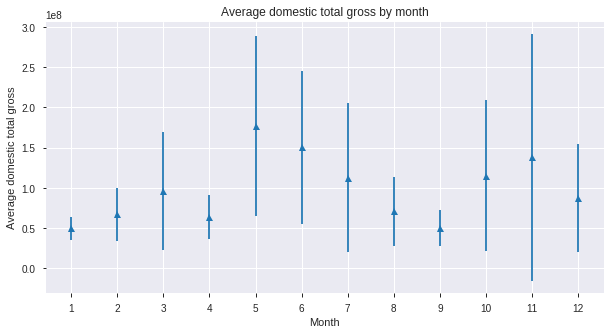

In [334]:
x = stat_month.Month
y = stat_month.DomesticTotalGross['mean']
e = stat_month.DomesticTotalGross['std']

plt.figure(figsize=(10,5))
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(list(range(1,13)))
plt.xlabel('Month')
plt.ylabel('Average domestic total gross')
plt.title('Average domestic total gross by month')
plt.show()